In [1]:
import pandas as pd
from pandas import Series, DataFrame

# 1. 시계열 데이터 기초

## 1.1 시계열 데이터 타입(datetime)

In [28]:
import datetime as dt

In [3]:
dt.datetime(2021,3,2)
##년,월,일 필수지정
##모듈명.자료형-datetime.datetime

datetime.datetime(2021, 3, 2, 0, 0)

In [4]:
##현재시간 리턴 함수 

now = dt.datetime.now()
now
##맨뒤 마이크로세컨

datetime.datetime(2021, 7, 9, 9, 47, 43, 722045)

In [5]:
#타임존 지정해서 날짜 생성

dt.datetime(2021,3,2,13,50,tzinfo = dt.timezone.utc)
dt.datetime.now(tz = dt.timezone.utc)
##utc시간대 기준으로 생성 

datetime.datetime(2021, 7, 9, 0, 47, 43, 788863, tzinfo=datetime.timezone.utc)

In [6]:
now.astimezone(dt.timezone.utc)
#만들어져있는 datetime 객체의 시간대도 utc 타임을 적용하여 변경 

datetime.datetime(2021, 7, 9, 0, 47, 43, 722045, tzinfo=datetime.timezone.utc)

## 1.2 timedelta 를 활용한 시간 계산

In [7]:
from datetime import timedelta

#timedelta : 시간 계산을 편하게 해주는 객체 

In [8]:
#현재 시간 기준으로 100일 뒤의 날짜
now + timedelta(days=100)

datetime.datetime(2021, 10, 17, 9, 47, 43, 722045)

In [9]:
#현재 시간 기준으로 1시간 25분 후의 시간
now + timedelta(hours = 1 , minutes = 25)

datetime.datetime(2021, 7, 9, 11, 12, 43, 722045)

In [10]:
#두 날짜 간의 차이 계산
dt1 = dt.datetime(2021,3,2,9,30)
dt2 = dt.datetime(2023,5,18,13,15)
diff = dt2 - dt1
diff

datetime.timedelta(days=807, seconds=13500)

In [11]:
#시간, 분 단위를 알기 위해서 추가 계산 필요
diff.seconds//3600

##시간

3

In [12]:
diff.seconds/60%60
##분

45.0

## 1.3 시계열 데이터 처리

In [13]:
import random
import pandas as pd
from pandas import DataFrame , Series
sample = DataFrame()
sample['date'] = pd.date_range(start = '20210101', periods=500).tolist()
sample['count'] = random.sample(range(1,1000), 500)

In [14]:
sample
#날짜와 어떤 count 값을 가지고 있는 데이터 프레임 

date  count
0   2021-01-01    429
1   2021-01-02    123
2   2021-01-03    298
3   2021-01-04    746
4   2021-01-05    812
..         ...    ...
495 2022-05-11    391
496 2022-05-12    887
497 2022-05-13    218
498 2022-05-14    162
499 2022-05-15    910

[500 rows x 2 columns]

In [15]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    500 non-null    datetime64[ns]
 1   count   500 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 KB


In [16]:
sample.describe()

count
count  500.000000
mean   487.960000
std    284.120565
min      1.000000
25%    246.000000
50%    484.500000
75%    729.500000
max    999.000000

In [17]:
print(sample.date.min(),sample.date.max())
#date의 범위 확인

2021-01-01 00:00:00 2022-05-15 00:00:00


In [18]:
# 7월달 데이터만 조회 #1 
# 조건 색인 활용
sample[(sample.date >= '2021-07-01')&(sample.date <= '2021-07-31')]


date  count
181 2021-07-01    821
182 2021-07-02    242
183 2021-07-03    407
184 2021-07-04    351
185 2021-07-05    848
186 2021-07-06    860
187 2021-07-07    353
188 2021-07-08    374
189 2021-07-09    234
190 2021-07-10    537
191 2021-07-11     82
192 2021-07-12    993
193 2021-07-13    640
194 2021-07-14    702
195 2021-07-15    908
196 2021-07-16      9
197 2021-07-17    617
198 2021-07-18    669
199 2021-07-19    173
200 2021-07-20    503
201 2021-07-21     35
202 2021-07-22    152
203 2021-07-23    248
204 2021-07-24    680
205 2021-07-25    857
206 2021-07-26    879
207 2021-07-27    377
208 2021-07-28    983
209 2021-07-29    350
210 2021-07-30    658
211 2021-07-31     63

In [19]:
# 7월달 데이터만 조회 #2
# isin() 함수 활용
#sample[Series([1,2,3,4,5]).isin([1,3,5])]
#홀수 값만 

#pd.date_range(start='2021-07-01',end='2021-07-31')
sample[sample.date.isin(pd.date_range(start='2021-07-01',end='2021-07-31'))]

date  count
181 2021-07-01    821
182 2021-07-02    242
183 2021-07-03    407
184 2021-07-04    351
185 2021-07-05    848
186 2021-07-06    860
187 2021-07-07    353
188 2021-07-08    374
189 2021-07-09    234
190 2021-07-10    537
191 2021-07-11     82
192 2021-07-12    993
193 2021-07-13    640
194 2021-07-14    702
195 2021-07-15    908
196 2021-07-16      9
197 2021-07-17    617
198 2021-07-18    669
199 2021-07-19    173
200 2021-07-20    503
201 2021-07-21     35
202 2021-07-22    152
203 2021-07-23    248
204 2021-07-24    680
205 2021-07-25    857
206 2021-07-26    879
207 2021-07-27    377
208 2021-07-28    983
209 2021-07-29    350
210 2021-07-30    658
211 2021-07-31     63

In [20]:
# 7월달 데이터만 조회 #3
# datetimeIndex 활용

sample2 = sample.set_index('date')
sample2
#datetimeIndex 로 변경



##여러방법 할때는 마지막이 가장 좋음 - 이 교수님

count
date             
2021-01-01    429
2021-01-02    123
2021-01-03    298
2021-01-04    746
2021-01-05    812
...           ...
2022-05-11    391
2022-05-12    887
2022-05-13    218
2022-05-14    162
2022-05-15    910

[500 rows x 1 columns]

- datetimeIndex 색인

In [21]:
# 2021년 데이터 선택
sample2['2021']
#sample2.index

<ipython-input-21-b18224b75acd>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sample2['2021']


count
date             
2021-01-01    429
2021-01-02    123
2021-01-03    298
2021-01-04    746
2021-01-05    812
...           ...
2021-12-27     94
2021-12-28    657
2021-12-29    686
2021-12-30     19
2021-12-31    113

[365 rows x 1 columns]

In [22]:
#2021년 7월 데이터만 선택
#sample2['2021-07']
sample2['2021-07-01':'2021-07-31']

count
date             
2021-07-01    821
2021-07-02    242
2021-07-03    407
2021-07-04    351
2021-07-05    848
2021-07-06    860
2021-07-07    353
2021-07-08    374
2021-07-09    234
2021-07-10    537
2021-07-11     82
2021-07-12    993
2021-07-13    640
2021-07-14    702
2021-07-15    908
2021-07-16      9
2021-07-17    617
2021-07-18    669
2021-07-19    173
2021-07-20    503
2021-07-21     35
2021-07-22    152
2021-07-23    248
2021-07-24    680
2021-07-25    857
2021-07-26    879
2021-07-27    377
2021-07-28    983
2021-07-29    350
2021-07-30    658
2021-07-31     63

In [23]:
# 2021년 3월 2일부터 2021년 3월 28일까지 데이터 선택
sample2['2021-03-02':'2021-03-28']

count
date             
2021-03-02     29
2021-03-03    104
2021-03-04    654
2021-03-05     76
2021-03-06    496
2021-03-07    486
2021-03-08     83
2021-03-09    416
2021-03-10    195
2021-03-11    732
2021-03-12    991
2021-03-13     12
2021-03-14    176
2021-03-15    843
2021-03-16    720
2021-03-17    471
2021-03-18    878
2021-03-19    683
2021-03-20     48
2021-03-21    232
2021-03-22     98
2021-03-23    352
2021-03-24    158
2021-03-25    219
2021-03-26    929
2021-03-27    763
2021-03-28    553

In [24]:
# 2021년 4월 28일 데이터 선택 (특정날짜)
sample2.loc['2021-04-28']
##에러
##범위설정 데이터는 슬라이싱 색인 
##특정날짜 --> .loc 해야함 ( 슬라이싱에만 loc 생략 )

count    769
Name: 2021-04-28 00:00:00, dtype: int64

## 1-4 strptime()으로 문자열을 날짜 타입으로 변환하기

In [29]:
문자열 = '21/08/11'

In [31]:
# 21년 8월 11일로 변환 
dt.datetime.strptime(문자열, '%y/%m/%d')

datetime.datetime(2021, 8, 11, 0, 0)

In [32]:
# 11년 8월 21일로 변환
dt.datetime.strptime(문자열,'%d/%m/%y')

datetime.datetime(2011, 8, 21, 0, 0)

In [34]:
# 8월 11일 21시로 변환
dt1 = dt.datetime.strptime(문자열,'%H/%m/%d')

In [35]:
#dt1의 year를 2021로 업데이트
dt1.replace(year=2021)

##replace() : 업데이트 가능

datetime.datetime(2021, 8, 11, 21, 0)

##### [실습] 아래 df에서 2020년 7월 데이터만 선택하기

In [36]:
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

date  value
0  2020-07-01     74
1  2020-07-02     81
2  2020-07-05     50
3  2020-07-10     14
4  2020-07-23     23
5  2020-07-24     68
6  2020-07-28     18
7  2020-08-05     76
8  2020-08-10     35
9  2020-08-23     52

In [38]:
df.info()
##date가 object(문자열)
##date컬럼의 데이터 타입이 datetime이 아니라 문자열이므로 아래 에러 발생

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   value   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [39]:
# 위에서 배운대로 해도 정상적으로 동작하지 않음
df.set_index('date')['2020-07']
##로우인덱스로 변환
##에러

KeyError: '2020-07'

In [43]:
# 해결책: df의 date컬럼의 타입을 datetime으로 변환 방법1)
df['date2'] = df.date.apply(lambda X: dt.datetime.strptime(X,'%Y-%m-%d'))

##df의 date라는 컬럼 선택 (시리즈)
##시리즈 각 값에 strptime을 적용 
## X : 첫번째부터 순회

In [44]:
df

date  value      date2
0  2020-07-01     74 2020-07-01
1  2020-07-02     81 2020-07-02
2  2020-07-05     50 2020-07-05
3  2020-07-10     14 2020-07-10
4  2020-07-23     23 2020-07-23
5  2020-07-24     68 2020-07-24
6  2020-07-28     18 2020-07-28
7  2020-08-05     76 2020-08-05
8  2020-08-10     35 2020-08-10
9  2020-08-23     52 2020-08-23

In [45]:
df.info()
##datetime64[ns] 타입으로 변환한 것 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes


In [46]:
#df의 date컬럼의 타입을 datetime으로 변환 방법2)
df['date3'] = pd.to_datetime(df.date, format = '%Y-%m-%d')

In [48]:
 #df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
 3   date3   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 448.0+ bytes


In [51]:
# 7월 데이터만 조회
df.set_index('date2')['2020-7']

##datetime타입의 컬럼을 인덱스(로우)로 변환(set_index) 해야지만 색인 가능

<ipython-input-51-107154358c79>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df.set_index('date2')['2020-7']


date  value      date3
date2                                   
2020-07-01  2020-07-01     74 2020-07-01
2020-07-02  2020-07-02     81 2020-07-02
2020-07-05  2020-07-05     50 2020-07-05
2020-07-10  2020-07-10     14 2020-07-10
2020-07-23  2020-07-23     23 2020-07-23
2020-07-24  2020-07-24     68 2020-07-24
2020-07-28  2020-07-28     18 2020-07-28

## 1.5 strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [53]:
# now 변수를 4자리년도-월-일 형식으로 출력

#now.strftime('%Y-%m-%d')
dt.datetime.strftime(now,'%Y-%m-%d')

##4자리-대문자

'2021-07-09'

In [54]:
# 실습 - now 변수를 월-일 시:분 형식으로 출력
now.strftime('%m-%d %H:%M')
#시,분 - 원래 대문자 H,M

'07-09 09:47'

* Tip. Week와 요일 정보 얻기(strftime)

In [133]:
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

##### [실습 #2] df에  week number(%U), weekday(%a) 컬럼 추가

In [59]:
#데이터
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

date  value
0  2020-07-01     51
1  2020-07-02     72
2  2020-07-05     50
3  2020-07-10     20
4  2020-07-23     81
5  2020-07-24     71
6  2020-07-28     98
7  2020-08-05     61
8  2020-08-10     67
9  2020-08-23     26

In [63]:
#date컬럼 데이터타임 타입으로 변환
df['date'] = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [66]:
#df에  week number(%V), weekday(%w) 컬럼 추가
#주차 , 요일

df['weekNumber'] = df.date.apply(lambda X: X.strftime('%V'))
df['weekDay'] = df.date.apply(lambda X: X.strftime('%a'))
df

date  value weekNumber weekDay
0 2020-07-01     51         27     Wed
1 2020-07-02     72         27     Thu
2 2020-07-05     50         27     Sun
3 2020-07-10     20         28     Fri
4 2020-07-23     81         30     Thu
5 2020-07-24     71         30     Fri
6 2020-07-28     98         31     Tue
7 2020-08-05     61         32     Wed
8 2020-08-10     67         33     Mon
9 2020-08-23     26         34     Sun

##### [실습 #3-1] 주차별 value 컬럼의 합 구하기

In [67]:
df.pivot_table(index = 'weekNumber', values= 'value',aggfunc = 'sum')

value
weekNumber       
27            173
28             20
30            152
31             98
32             61
33             67
34             26

##### [실습 #3-2] 요일별 value 컬럼의 평균 구하기

In [68]:
df.pivot_table(index = 'weekDay', values= 'value',aggfunc = 'mean')

value
weekDay       
Fri       45.5
Mon       67.0
Sun       38.0
Thu       76.5
Tue       98.0
Wed       56.0

## 2. 시계열 데이터 응용 - Covid-19 현황 분석

#### 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [77]:
covid = pd.read_excel('data/owid-covid-data.xlsx')
covid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

In [ ]:
#covid.columns
covid.info()

##### 2. date 컬럼을 datetime으로 변경하기

In [78]:
covid.date = pd.to_datetime(covid.date, format = '%Y-%m-%d')

In [71]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               70851 non-null  object        
 1   continent                              67325 non-null  object        
 2   location                               70851 non-null  object        
 3   date                                   70851 non-null  datetime64[ns]
 4   total_cases                            69938 non-null  float64       
 5   new_cases                              69936 non-null  float64       
 6   new_cases_smoothed                     68935 non-null  float64       
 7   total_deaths                           60914 non-null  float64       
 8   new_deaths                             61072 non-null  float64       
 9   new_deaths_smoothed                    68935 non-null  float6

#### 3. 간단하게 분석하기 위해 데이터 범위 좁히기
- United States, Brazil, France, South Korea 데이터만 선택

In [74]:
covid.location.unique().size

214

In [79]:
covid = covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

- location, date, total_cases, new_cases 컬럼만 선택

In [80]:
covid = covid[['location', 'date', 'total_cases', 'new_cases']]

#### 4. 데이터 분석 실습
- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기
- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기
...

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
 - 월별 마지막 날 기준으로 누적 확진자수 구하기
 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 참고

In [82]:
#매월 마지막 날짜 데이터만 선택
#covid[covid.date.isin(['2020-02-29','2020-03-31','2020-04-30'])
ex1 = covid[covid.date.isin(pd.date_range(start=covid.date.min(),
                                    end=covid.date.max(),
                                    freq = 'M'))]
                                    
                      
#freq : 어떤 주기로 (기본값 : day)

<AxesSubplot:xlabel='date'>

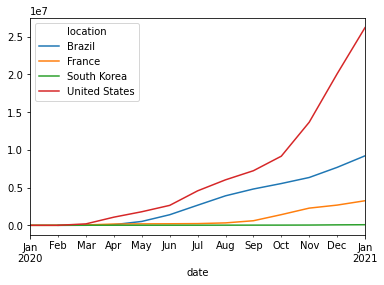

In [84]:
ex1.set_index(['date','location']).unstack()['total_cases'].plot()

- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기

In [85]:
covid['year'] = covid.date.apply(lambda X: X.strftime('%Y'))
covid['month'] =covid.date.apply(lambda X: X.strftime('%m'))
covid['day'] =covid.date.apply(lambda X: X.strftime('%d'))
covid['weekNumber'] =covid.date.apply(lambda X: X.strftime('%U'))
covid['weekDay'] =covid.date.apply(lambda X: X.strftime('%a'))


In [86]:
covid


location       date  total_cases  new_cases  year month day  \
9104          Brazil 2020-02-26          1.0        1.0  2020    02  26   
9105          Brazil 2020-02-27          1.0        0.0  2020    02  27   
9106          Brazil 2020-02-28          1.0        0.0  2020    02  28   
9107          Brazil 2020-02-29          2.0        1.0  2020    02  29   
9108          Brazil 2020-03-01          2.0        0.0  2020    03  01   
...              ...        ...          ...        ...   ...   ...  ..   
67543  United States 2021-02-19   28006110.0   106355.0  2021    02  19   
67544  United States 2021-02-20   28077620.0    71510.0  2021    02  20   
67545  United States 2021-02-21   28134115.0    56495.0  2021    02  21   
67546  United States 2021-02-22   28190159.0    56044.0  2021    02  22   
67547  United States 2021-02-23   28261595.0    71436.0  2021    02  23   

      weekNumber weekDay  
9104          08     Wed  
9105          08     Thu  
9106          08     Fri  
9107          08     Sat  
9108          09     Sun  
...          ...     ...  
67543         07     Fri  
67544         07     Sat  
67545         08     Sun  
67546         08     Mon  
67547         08     Tue  

[1560 rows x 9 columns]

In [88]:
#쿼터(분기)정보 추가하기
covid['quarter'] = covid.date.apply(lambda X: pd.Timestamp(X).quarter)

- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기

<AxesSubplot:xlabel='weekDay'>

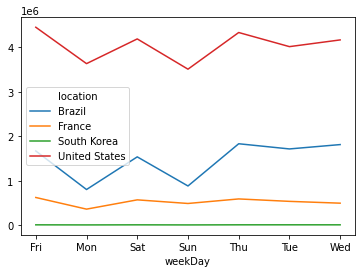

In [92]:
#요일별 신규확진자 수 합
covid.pivot_table(index = 'weekDay',columns='location',aggfunc='sum',values='new_cases').plot()

<AxesSubplot:xlabel='year,quarter'>

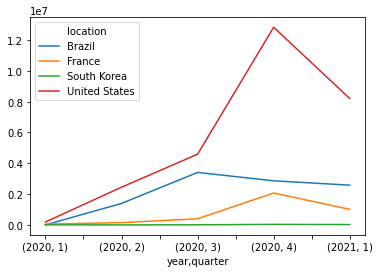

In [95]:
#분기별 신규 확진자 수 합
covid.pivot_table(index = ['year','quarter'],columns='location',aggfunc='sum',values='new_cases').plot()

In [ ]:
#quarter만 지정하면 잘못된 결과를 얻을 수 있기 때문에 year를 추가해 주어야함 